In [46]:
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_excel('heart_failure_clinical_records_dataset.xls')

df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [47]:
df. rename(columns = {'creatinine_phosphokinase':'cr_ph', 'ejection_fraction':'ej_fr', 'high_blood_pressure':'hbp','serum_creatinine':'ser_cr', 'serum_sodium':'ser_na','DEATH_EVENT':'status'}, inplace = True)
# df('creatinine_phosphokinase') =
print(df)

      age  anaemia  cr_ph  diabetes  ej_fr  hbp  platelets  ser_cr  ser_na  \
0    75.0        0    582         0     20    1  265000.00     1.9     130   
1    55.0        0   7861         0     38    0  263358.03     1.1     136   
2    65.0        0    146         0     20    0  162000.00     1.3     129   
3    50.0        1    111         0     20    0  210000.00     1.9     137   
4    65.0        1    160         1     20    0  327000.00     2.7     116   
..    ...      ...    ...       ...    ...  ...        ...     ...     ...   
294  62.0        0     61         1     38    1  155000.00     1.1     143   
295  55.0        0   1820         0     38    0  270000.00     1.2     139   
296  45.0        0   2060         1     60    0  742000.00     0.8     138   
297  45.0        0   2413         0     38    0  140000.00     1.4     140   
298  50.0        0    196         0     45    0  395000.00     1.6     136   

     sex  smoking  time  status  
0      1        0     4      

In [48]:

from numpy import set_printoptions
from sklearn.preprocessing import Normalizer

# #Splitting into dependent and independent data
X_data = df[['age', 'ej_fr', 'ser_cr', 'ser_na','time']]
# X_data = df.drop(['status','anaemia','cr_ph','diabetes','hbp','platelets','sex','smoking','time'], axis=1) #independent variables
Y_data = df.pop('status')


#normalised the independent data
#l2 leverages more features and distances between points remain the same
df_normaliser = Normalizer(norm='l2').fit(X_data)
my_normalized_data = df_normaliser.transform(X_data)
set_printoptions(precision=2)
print('\n My Normalised data:\n', my_normalized_data[200:204])
#dataset are now within same ranges


 My Normalised data:
 [[0.26 0.18 0.   0.56 0.76]
 [0.19 0.25 0.   0.56 0.77]
 [0.28 0.24 0.   0.55 0.75]
 [0.25 0.1  0.01 0.57 0.78]]


In [49]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    test_size=0.3,  # 70% training and 30% test
                                                    random_state=1)
#Checking the  number of test and train data
print('\n The total of training dataset:', X_train.shape)
print('\n The total of test dataset:', X_test.shape)
print(Y_test.shape)


 The total of training dataset: (209, 5)

 The total of test dataset: (90, 5)
(90,)


In [50]:
#Fitting model using full dataset
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
third_classifier = LogisticRegression(intercept_scaling= '1',max_iter=1000,multi_class= 'auto', penalty='l2',random_state=1, solver='newton-cg',tol=0.0001, verbose= 0, warm_start=False)#(solver='newton-cg', max_iter= 1000, random_state=1)
third_classifier.fit(X_train,Y_train)
Y_Pred = third_classifier.predict(X_test)
print(Y_Pred)
from sklearn.metrics import accuracy_score

#Checking first model accuracy
model_acc = accuracy_score(Y_test, Y_Pred)
print('\n LR accuracy:{:.2f}\n'.format(model_acc))

[0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1]

 LR accuracy:0.83



In [51]:
from sklearn.metrics import classification_report, confusion_matrix

#Confusion matrix for first model
#Constructing confusion matrix
box = confusion_matrix(Y_test, Y_Pred)
# print d matrix
print('The confusion matrix: \n', box, '\n')
# construct classification report
class_report = classification_report(Y_test, Y_Pred)
print('Classification report:\n ', class_report)  # Relate it to the success
# matrix_info =

The confusion matrix: 
 [[58  6]
 [ 9 17]] 

Classification report:
                precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.74      0.65      0.69        26

    accuracy                           0.83        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90



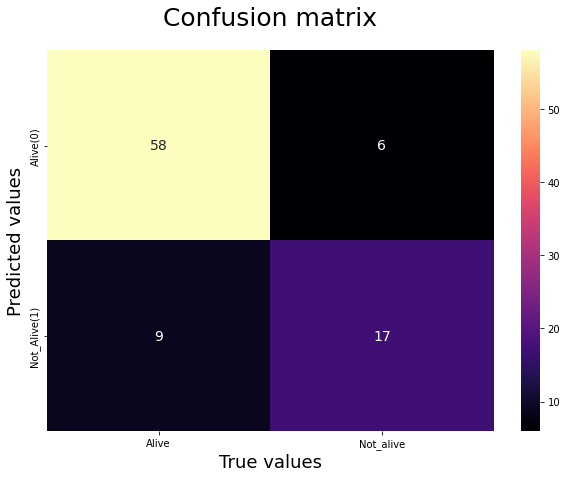

In [52]:
from matplotlib import pyplot as plt
import seaborn as sn

ds= pd.DataFrame(box, index = ['Alive(0)', 'Not_Alive(1)'],
                            columns = ['Alive', 'Not_alive'])
plt.figure(figsize=(10, 7))
sn.heatmap(ds, annot=True, cmap='magma', fmt='.5g',
           annot_kws={"size": 14}).set_title('Confusion matrix', fontsize=25, y=1.05)
plt.xlabel('True values', fontsize=18)
plt.ylabel('Predicted values', fontsize=18)
plt.show()

In [53]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

#model tuning using gridsearch for first model with full dataset
#creating cross validation split
kfold_split = StratifiedKFold(n_splits=10, shuffle=False)

#declaring a dictionaryof hyperparameters and values
classifier_hypara = dict()

classifier_hypara['solver'] = ['newton-cg','sag','saga','lbfgs']

#Performing gridsearch and fitting
classifier_grid = GridSearchCV(third_classifier, classifier_hypara, scoring='f1', n_jobs=-1, cv=kfold_split)
classifier_grid_fit = classifier_grid.fit(X_data, Y_data)

#Computing the array containingthe 10-folds CV
CV_scores = -cross_val_score(classifier_grid_fit, X_train, Y_train, cv=kfold_split)
print("\nCross Val mean :{:.3f} (std:{:.3f})".format(CV_scores.mean() * -1, CV_scores.std()), end="\n\n")

#Printing the hyperparameters
print('Best hyperparameters: %s' % classifier_grid_fit.best_params_)

#Printing best hyperparameters
print('\nSuggested Best Parameters:\n', classifier_grid_fit.best_estimator_.get_params())
print('Best Score: %s{:.3f}\n'.format(classifier_grid_fit.best_score_))

/Users/hadizattalabi/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hadizattalabi/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hadizattalabi/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hadizattalabi/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hadizattalabi/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hadizattalabi/venv/lib/python3.8/site-packages/s


Cross Val mean :0.727 (std:0.115)

Best hyperparameters: {'solver': 'newton-cg'}

Suggested Best Parameters:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': '1', 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best Score: %s0.643



/Users/hadizattalabi/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
